In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# define constants
batch_size = 128
epochs = 100
num_classes = 9

In [4]:
# load files
train_X = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/train_X.npz')
train_y = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/train_y.npz')
test_X = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/test_X.npz')
test_y = np.load('/gdrive/MyDrive/Colab/Classify_Words_of_a_Person_with_Articulation_Disorder/data/test_y.npz')

In [5]:
# define the model architecture with CNN
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(13,2300)),
                          keras.layers.Reshape(target_shape=(13,2300,1)),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu),
                          keras.layers.MaxPooling2D(pool_size=(2,2)),
                          keras.layers.Dropout(0.25), # abandon some to speed up execution and increase reliability
                          keras.layers.Flatten(input_shape=(13,2300)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# save the best model as digits_model.h5
filepath = '/content/best_model.h5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

# define a callback to prevent overfitting
monitor_earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [7]:
history = model.fit(train_X['X'], train_y['y'],
                    validation_data=(test_X['X'], test_y['y']),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[model_checkpoint, monitor_earlystop])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


6/6 [==============================] - 37s 388ms/step - loss: 2.1522 - accuracy: 0.1806 - val_loss: 1.9175 - val_accuracy: 0.2941
Epoch 2/100
6/6 [==============================] - 1s 211ms/step - loss: 1.8930 - accuracy: 0.2762 - val_loss: 1.6634 - val_accuracy: 0.2680
Epoch 3/100
6/6 [==============================] - 1s 213ms/step - loss: 1.7316 - accuracy: 0.2901 - val_loss: 1.5672 - val_accuracy: 0.3660
Epoch 4/100
6/6 [==============================] - 1s 208ms/step - loss: 1.6314 - accuracy: 0.3318 - val_loss: 1.5078 - val_accuracy: 0.3856
Epoch 5/100
6/6 [==============================] - 1s 210ms/step - loss: 1.5914 - accuracy: 0.3580 - val_loss: 1.4839 - val_accuracy: 0.3464
Epoch 6/100
6/6 [==============================] - 1s 208ms/step - loss: 1.5779 - accuracy: 0.3194 - val_loss: 1.4530 - val_accuracy: 0.4444
Epoch 7/100
6/6 [==============================] - 1s 211ms/step - loss: 1.5185 - accuracy: 0.3781 - val_loss: 1.4458 - val_accuracy: 0.3595
Epoch 8/100
6/6 [=======

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 29900)             0         
_________________________________________________________________
reshape (Reshape)            (None, 13, 2300, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 11, 2298, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 2296, 64)       18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 2294, 32)       18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 1147, 32)       0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 1147, 32)       0

In [9]:
# evaluate the model using test dataset
test_loss, test_acc = model.evaluate(test_X['X'], test_y['y'])
print("Test Accuracy: ", test_acc)

5/5 [==============================] - 1s 18ms/step - loss: 0.3408 - accuracy: 0.9150
Test Accuracy:  0.915032684803009


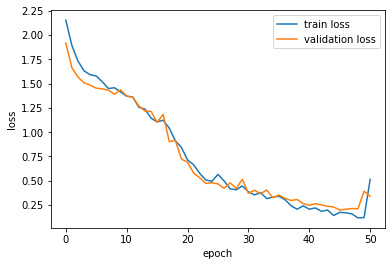

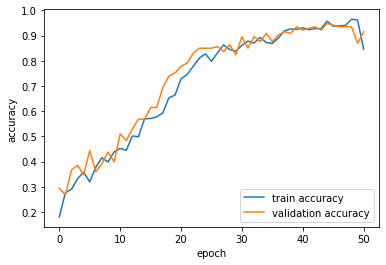

In [10]:
# evaluate the model using graphs
fig, ax_loss = plt.subplots()
fig, ax_acc = plt.subplots()

ax_loss.plot(history.history['loss'], label="train loss")
ax_loss.plot(history.history['val_loss'], label="validation loss")
ax_loss.set_xlabel('epoch')
ax_loss.set_ylabel('loss')
ax_loss.legend(loc='upper right')

ax_acc.plot(history.history['accuracy'], label="train accuracy")
ax_acc.plot(history.history['val_accuracy'], label="validation accuracy")
ax_acc.set_xlabel('epoch')
ax_acc.set_ylabel('accuracy')
ax_acc.legend(loc='lower right')

plt.show()

In [ ]:
# download the model for testing
from google.colab import files
files.download(filepath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>